# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn (extra credit)
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [1]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json
s = json.load( open("fbb_matplotlibrc.json") )
pl.rcParams.update(s)



Populating the interactive namespace from numpy and matplotlib


/home/urwa/miniconda3/envs/ADS2018/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [6]:
def getCitibikeTwoMonthData(ds1,ds2):
    getCitiBikeCSV(ds1)
    getCitiBikeCSV(ds2)
    df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + ds1 + '-citibike-tripdata.csv')
    df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + ds2 + '-citibike-tripdata.csv')
    return df1.append(df2)

In [7]:
month1 = '201501'
month2 = '201507'
df = getCitibikeTwoMonthData(month1,month2)

('Downloading', '201501')
file in place, you can continue
('Downloading', '201507')
file in place, you can continue


In [8]:
#df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [9]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [10]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

# SPLIT BY CATEGORY

as an example I am splitting data by gender and looking at age or riders:

**H0: there is no statistical difference in the age distribution of male and female riders**
$$ \alpha = 0.05 $$

extracting the age happens in the cell below

In [11]:
#df is the dataframe where the content of the csv file is stored
#df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
#df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

dayHours = range(6,20)
isDay = (df['date'].dt.hour >= 6) & (df['date'].dt.hour < 20) #in dayHours

dfDay = df.loc[isDay]
dfNight = df.loc[(isDay == False)]


In [12]:
#dropping some data I no longer need
#... your code here...
dfDay.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
563,1542,1/1/2015 6:00,1/1/2015 6:26,361,Allen St & Hester St,40.716059,-73.991908,116,W 17 St & 8 Ave,40.741776,-74.001497,17649,Customer,NaN,0,2015-01-01 06:00:00
564,166,1/1/2015 6:05,1/1/2015 6:07,537,Lexington Ave & E 24 St,40.740259,-73.984092,507,E 25 St & 2 Ave,40.739126,-73.979738,19339,Subscriber,1983.0,1,2015-01-01 06:05:00
565,972,1/1/2015 6:10,1/1/2015 6:26,499,Broadway & W 60 St,40.769155,-73.981918,504,1 Ave & E 15 St,40.732219,-73.981656,18718,Subscriber,1969.0,1,2015-01-01 06:10:00
566,238,1/1/2015 6:10,1/1/2015 6:14,489,10 Ave & W 28 St,40.750664,-74.001768,379,W 31 St & 7 Ave,40.749156,-73.991600,16875,Subscriber,1971.0,1,2015-01-01 06:10:00
567,1214,1/1/2015 6:13,1/1/2015 6:33,266,Avenue D & E 8 St,40.723684,-73.975748,417,Barclay St & Church St,40.712912,-74.010202,20120,Subscriber,1987.0,2,2015-01-01 06:13:00


In [13]:
dfNight.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [14]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
dfDay.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1.158735e+06,1.158735e+06,1.158735e+06,1.158735e+06,1.158735e+06,1.158735e+06,1.158735e+06,1.158735e+06,1.004652e+06,1.158735e+06
mean,8.881750e+02,4.592381e+02,4.073530e+01,-7.399104e+01,4.571383e+02,4.073516e+01,-7.399138e+01,1.898592e+04,1.975828e+03,1.064900e+00
std,5.857583e+03,3.816007e+02,1.940747e-02,1.237012e-02,3.805346e+02,1.930309e-02,1.232866e-02,2.567858e+03,1.153658e+01,5.729273e-01
min,6.000000e+01,7.200000e+01,4.068034e+01,-7.401713e+01,7.200000e+01,4.068034e+01,-7.401713e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,3.910000e+02,3.070000e+02,4.072182e+01,-7.400004e+01,3.050000e+02,4.072182e+01,-7.400150e+01,1.677700e+04,1.968000e+03,1.000000e+00
50%,6.220000e+02,4.170000e+02,4.073705e+01,-7.399076e+01,4.120000e+02,4.073705e+01,-7.399099e+01,1.895600e+04,1.978000e+03,1.000000e+00
75%,1.027000e+03,4.940000e+02,4.075066e+01,-7.398192e+01,4.920000e+02,4.075022e+01,-7.398205e+01,2.125600e+04,1.985000e+03,1.000000e+00
max,5.174309e+06,3.180000e+03,4.077152e+01,-7.395005e+01,3.180000e+03,4.077152e+01,-7.395005e+01,2.430400e+04,1.999000e+03,2.000000e+00


In [15]:
dfNight.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,2.124930e+05,212493.000000,212493.000000,212493.000000,212493.000000,212493.000000,212493.000000,212493.000000,180583.000000,212493.000000
mean,9.800829e+02,446.755145,40.733650,-73.991681,450.029973,40.732549,-73.990495,19062.371664,1978.583959,1.031987
std,1.200562e+04,366.662591,0.018776,0.011962,373.305193,0.019350,0.012440,2599.152474,10.968880,0.577069
min,6.000000e+01,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1885.000000,0.000000
25%,3.890000e+02,301.000000,40.721655,-74.000264,305.000000,40.719261,-73.999318,16820.000000,1972.000000,1.000000
50%,6.360000e+02,403.000000,40.734546,-73.991382,406.000000,40.732916,-73.990697,19052.000000,1982.000000,1.000000
75%,1.048000e+03,484.000000,40.746920,-73.984092,486.000000,40.746647,-73.981918,21389.000000,1987.000000,1.000000
max,3.611666e+06,3180.000000,40.771522,-73.950048,3180.000000,40.771522,-73.950048,24304.000000,1999.000000,2.000000


In [35]:
# dropping NaN values
dfDay['tripduration'].dropna(inplace= True)
dfNight['tripduration'].dropna(inplace= True)

lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

In [41]:
maxDuration = np.max((np.max(dfDay['tripduration']),np.max(dfNight['tripduration'])))
print(maxDuration)

5174309


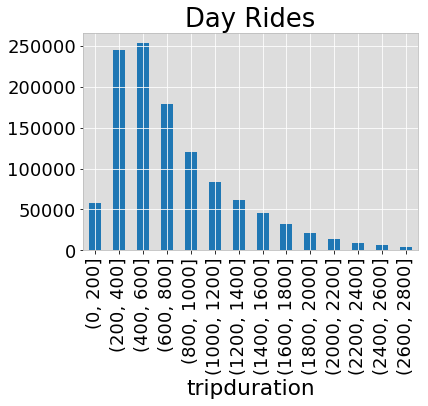

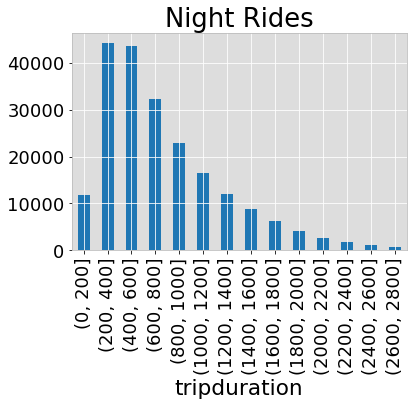

In [43]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!


#dfDay1 = dfDay.iloc[range(1,100)]

bins = np.arange(0, 3000, 200)
axM = dfDay.tripduration.groupby(pd.cut(dfDay.tripduration, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("Day Rides")
axF = dfNight.tripduration.groupby(pd.cut(dfNight.tripduration, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("Night Rides");


**Figure 1: The distribution seem to be roughly normal for both. It is poisson like in fact that makes sense because trip duration cant be negative. Distribution hsapes are similar but the night distributions is perhaps little shifted towards the left.

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

              count_nonzero
tripduration               
(0, 200]           0.005533
(200, 400]         0.001166
(400, 600]         0.012951
(600, 800]         0.016773
(800, 1000]        0.012657
(1000, 1200]       0.006952
(1200, 1400]       0.003609
(1400, 1600]       0.002154
(1600, 1800]       0.000887
(1800, 2000]       0.000668
(2000, 2200]       0.000106
(2200, 2400]       0.000230
(2400, 2600]       0.000089
(2600, 2800]       0.000000


/home/urwa/miniconda3/envs/ADS2018/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


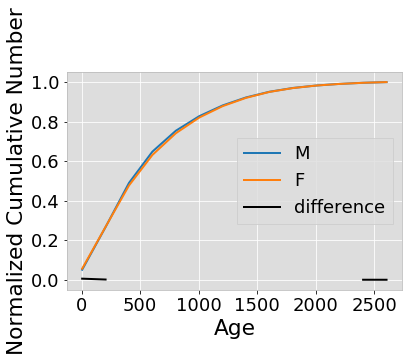

In [44]:
#print df.ageS, df.ageS.cumsum()

csM=dfDay.tripduration.groupby(pd.cut(dfDay.tripduration, bins)).agg([count_nonzero]).cumsum()

csF=dfNight.tripduration.groupby(pd.cut(dfNight.tripduration, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: Cumulative distributions show that the distributions are very similar with only some differences in the beginning.

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [3]:
import scipy.stats
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [46]:
ks = scipy.stats.ks_2samp(dfDay.tripduration, dfNight.tripduration)
print (ks)

Ks_2sampResult(statistic=0.014345620135568948, pvalue=1.5319596973445115e-32)


**  FILL IN THE CELL BELOW!**

In [47]:
## your words here!...
## this cell is for you to tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS
## to do that refer to the scipy documentation to understand the output of the scipy.stats.ks_2samp function
def report_result_ks(p,a):
    print ('is the p value ' + 
           '{0:.2f} smaller than the critical value {1:.2f}?'.format(p,a))
    if p < a:
        print ("YES!")
    else: 
        print ("NO!")
    
    print ('the Null hypothesis is {}'.format(\
                            'rejected' if p < a  else 'not rejected') )

significanceLevel = 0.05
report_result_ks(ks[1],significanceLevel)


is the p value 0.00 smaller than the critical value 0.05?
YES!
the Null hypothesis is rejected


The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

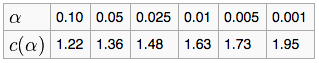

In [16]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="../plotsforclasses/ks2sample_table.png")

In [17]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS


# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [51]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis
print(len(dfDay))
print(len(dfNight))

1158735
212493


(1158735, 16)

In [53]:
dfDaySmall = dfDay.sample(len(dfNight))

In [54]:
day = np.sort(dfDaySmall.tripduration)
night = np.sort(dfNight.tripduration)
scipy.stats.pearsonr(day,night)

(0.93669806954560841, 0.0)

### Correlation is large and statistically significant but correlation of sorted arrays does not make any sense ! For sorted arrays there will always be a correlation even if distributions are drastically different, because value pairs will always tend to increase!

In [5]:
np.random.seed(101)
a = np.sort(np.random.randn(100000))
b =  np.sort(numpy.random.uniform(low=0.0, high=1.0, size=100000))

ks = scipy.stats.ks_2samp(a, b)
print (ks)

scipy.stats.pearsonr(a,b)


Ks_2sampResult(statistic=0.50009000000000003, pvalue=0.0)


(0.97714627969292367, 0.0)

### Normal and uniform distribution show correlation when values are sorted. Hence simple sorting does not make sense. 

### But correlation requires value pairs, i-e two values have to correspond to the same observation. One way of doing that in out scenario would be to aggregate by the day and see if correlation is obseved.

In [60]:
#dfDay.groupby('tripduration').avg().reset_index()
dfDay['Day'] = dfDay['date'].dt.day
dfDay['Month'] = dfDay['date'].dt.month

dfNight['Day'] = dfNight['date'].dt.day
dfNight['Month'] = dfNight['date'].dt.month

/home/urwa/miniconda3/envs/ADS2018/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/urwa/miniconda3/envs/ADS2018/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/urwa/miniconda3/envs/ADS2018/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [67]:
dayGrouped = dfDay[['Month','Day','tripduration']].groupby(('Month','Day')).mean().reset_index()
nightGrouped = dfNight[['Month','Day','tripduration']].groupby(('Month','Day')).mean().reset_index()

/home/urwa/miniconda3/envs/ADS2018/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.
/home/urwa/miniconda3/envs/ADS2018/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  


In [75]:
both = pd.merge(dayGrouped, nightGrouped, on=('Month','Day'), how='inner')
both.head()

,Month,Day,tripduration_x,tripduration_y
0,1,1,820.812730,739.838942
1,1,2,738.582285,677.964207
2,1,3,653.782214,664.613527
3,1,4,686.200000,621.721879
4,1,5,644.479104,578.461433


In [70]:
scipy.stats.pearsonr(both.tripduration_x,both.tripduration_y)

(0.79178512425418468, 1.8293712549112852e-14)

### They are correlated and p value is very small (<0.05) so the null hypithesis of no correlation can be rejected. Though we have very small data length as compared to previous technique but computing correlation makes sense since these are value pairs.

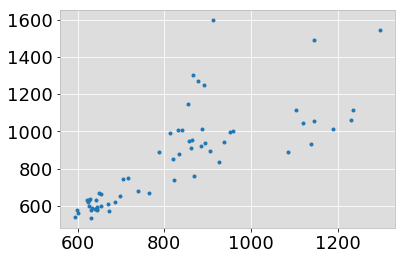

In [73]:
plot(both.tripduration_x,both.tripduration_y,'.')

### Scatter plot further reveals the correlation.

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [74]:
scipy.stats.spearmanr(both.tripduration_x,both.tripduration_y)

SpearmanrResult(correlation=0.86537735136360217, pvalue=1.1697020935469181e-19)

### High positive relation with small p value  (<0.05) so that we can reject the null hypothsis of no correlation.

** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**